# EDA

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_path = os.path.abspath(os.path.join('../../'))
sys.path.append(project_path)

In [2]:
from src.etl.bronze.extractors.data_structure_extract_strategy import DataExtractor

# config = {
#     "type": "local_bbc",
#     "path": os.path.join(project_path, "data","raw","source_pariza_sharif_BBC_news_summary", "BBC News Summary")
#     }
# extractor_bbc = DataExtractor.get_extractor(cfg=config)
# df = extractor_bbc.extractor()
# df.head()
# full_path =os.path.join(project_path, "data","raw" ,"source_pariza_sharif_BBC_news_summary", "BBC News Summary","local_bbc_pariza_sharif.csv")
# df.to_csv(full_path, index=False)

In [3]:
config_bbc = {
    "type": "csv",
    "path": os.path.join(project_path, "data", "raw","source_pariza_sharif_BBC_news_summary", "BBC News Summary","local_bbc_pariza_sharif.csv")
    }
extractor_bbc = DataExtractor.get_extractor(cfg=config_bbc)
df = extractor_bbc.extractor()
df.head()


,filename,category,News Articles,Summaries
0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,001.txt,entertainment,Gallery unveils interactive tree\n\nA Christma...,"The messages will be ""unwrapped"" by sculptor R..."
2,001.txt,politics,Labour plans maternity pay rise\n\nMaternity p...,She said her party would boost maternity pay i...
3,001.txt,sport,Claxton hunting first major medal\n\nBritish h...,"For the first time, Claxton has only been prep..."
4,001.txt,tech,Ink helps drive democracy in Asia\n\nThe Kyrgy...,The other common type of ink in elections is i...


In [4]:
import src.etl.bronze.transform.data_cleansing_strategy as BaseCleansing
strategies = [
        BaseCleansing.DropColumnsCleansing(columns=['filename']),
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
        BaseCleansing.SpaceCleansing(columns=['News Articles', 'Summaries']),
        BaseCleansing.ReplaceForCleansing(columns=['News Articles', 'Summaries'], to_replace=[""," "], to_replace_with=np.nan),
        BaseCleansing.DropNaCleansing(['News Articles', 'Summaries']),
        BaseCleansing.LowerCaseCleansing(columns=['News Articles', 'Summaries']),
        ]
cleansing = BaseCleansing.DataCleansing(strategies)
df = cleansing.clean(df)
df.head()


Dropping columns: ['filename']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: News Articles
Stripping spaces from column: Summaries
----------------------------------------
Replacing ['', ' '] with nan in column: News Articles
Replacing ['', ' '] with nan in column: Summaries
----------------------------------------
Dropping rows with empty or NaN in '['News Articles', 'Summaries']'
----------------------------------------
Converting values in column 'News Articles' to lowercase.
Converting values in column 'Summaries' to lowercase.
----------------------------------------


,category,News Articles,Summaries
0,business,ad sales boost time warner profit\n\nquarterly...,timewarner said fourth quarter sales rose 2% t...
1,entertainment,gallery unveils interactive tree\n\na christma...,"the messages will be ""unwrapped"" by sculptor r..."
2,politics,labour plans maternity pay rise\n\nmaternity p...,she said her party would boost maternity pay i...
3,sport,claxton hunting first major medal\n\nbritish h...,"for the first time, claxton has only been prep..."
4,tech,ink helps drive democracy in asia\n\nthe kyrgy...,the other common type of ink in elections is i...


In [5]:
import src.etl.bronze.transform.data_transform_strategy as BaseTransform
maps = {
        'News Articles': 'str',
        'Summaries': 'str',
        'category':'category'
    }
rename_map = {
        'News Articles': 'title',
        'Summaries': 'description',
        'category': 'categories'
    }
strategies = [
        BaseTransform.AstypeTransform(dtype_map=maps),
        BaseTransform.RenameColumnsTransform(rename_map=rename_map),
    ]
transform = BaseTransform.DataTransform(strategies)
df= transform.transform(df)
df.head()


Changing column 'News Articles' to str ...
Changing column 'Summaries' to str ...
Changing column 'category' to category ...
----------------------------------------
Renaming columns: {'News Articles': 'title', 'Summaries': 'description', 'category': 'categories'}
----------------------------------------


,categories,title,description
0,business,ad sales boost time warner profit\n\nquarterly...,timewarner said fourth quarter sales rose 2% t...
1,entertainment,gallery unveils interactive tree\n\na christma...,"the messages will be ""unwrapped"" by sculptor r..."
2,politics,labour plans maternity pay rise\n\nmaternity p...,she said her party would boost maternity pay i...
3,sport,claxton hunting first major medal\n\nbritish h...,"for the first time, claxton has only been prep..."
4,tech,ink helps drive democracy in asia\n\nthe kyrgy...,the other common type of ink in elections is i...


In [6]:
import src.etl.bronze.transform.data_encoding_strategy as BaseEncoder
mapping = {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'politics': 4, 'science': 5, 'sports': 6, 'technology': 7}
strategies = [
        BaseEncoder.LabelColumnsEncoder(columns=['categories']),
        #BaseEncoder.CustomMapEncoder(columns=['categories'], mapping=mapping)
    ]
encoder = BaseEncoder.DataEncoder(strategies)
df = encoder.encode(df)
df.head()

Mapping for categories: {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}
----------------------------------------


,categories,title,description,encoded_categories
0,business,ad sales boost time warner profit\n\nquarterly...,timewarner said fourth quarter sales rose 2% t...,0
1,entertainment,gallery unveils interactive tree\n\na christma...,"the messages will be ""unwrapped"" by sculptor r...",1
2,politics,labour plans maternity pay rise\n\nmaternity p...,she said her party would boost maternity pay i...,2
3,sport,claxton hunting first major medal\n\nbritish h...,"for the first time, claxton has only been prep...",3
4,tech,ink helps drive democracy in asia\n\nthe kyrgy...,the other common type of ink in elections is i...,4


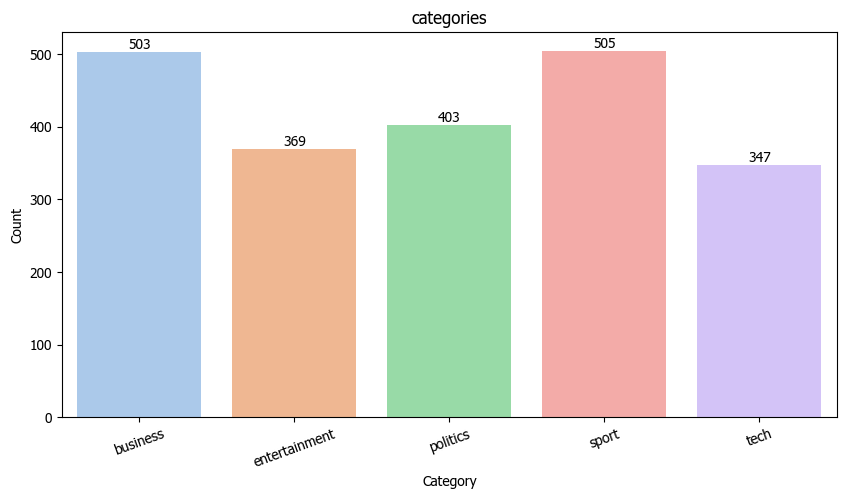

----------------------------------------


In [7]:
import src.analysis.visualization.data_univariate_visualization_strategy as BaseViz
strategies = [
    BaseViz.BarplotUniViz(
        sns_kwargs={"palette": "pastel", "hue": "category", "legend": False},
        plt_kwargs={"figsize": (10, 5), "title": 'categories', "rotation": 20, "fontsize":10}
        )
]
viz = BaseViz.UniVisualizer(strategies)
viz.visualize(df,'categories')